# MLP

This is an MLP model that explores using a single vector derived from pre-trained word embedding vectors.


Step 1: Importing the required libraries

In [23]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors

Step 2: Loading the pre-trained glove vector embedding model 

In [2]:
# Load pre-trained embedding layer
filename = "C:\\Users\\ryanm\\OneDrive\\Desktop\\deep learning\\assignments\\Deep-Learning-Assignment-2\\glove.6B.300d.txt.word2vec"
glove = KeyedVectors.load_word2vec_format(filename, binary=False) # for now binary is true





Step 3: Load training and testing data

In [24]:
# Load the training dataset
df_training = pd.read_csv('C:\\Users\\ryanm\\OneDrive\\Desktop\\deep learning\\assignments\\Deep-Learning-Assignment-2\\train.csv', delimiter=',')
training_data = df_training.values[:,0]
training_labels = np.array(df_training.values[:, 1], dtype=np.float32)

# Load the testing 
df_testing = pd.read_csv('C:\\Users\\ryanm\\OneDrive\\Desktop\\deep learning\\assignments\\Deep-Learning-Assignment-2\\test.csv')  
testing_data = np.array(df_testing.values[:,0])
testing_labels = np.array(df_testing.values[:,1], dtype=np.float32)

Step 4: Pre-Processing training and testing data:

Pre-processing steps:
- Remove any punctuation
- Ensure words are spelled correctly
- make sentences lowercase
- Remove URL's
- Reduce words to their stems
- Tokenise the words

In [25]:
import re
from spellchecker import SpellChecker
import string

for idx, sentence in enumerate(training_data):

    print (sentence)

    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    # Detect lack of spaces using regular expression and make all sentences lowercase
    sentence = re.findall(r'\b(\w+)\b', sentence.lower())  # Use 'sentence' instead of 'training_data[x]'

    # Spell checking using pyspellchecker
    spell = SpellChecker()
    misspelled_words = spell.unknown(sentence)

    # Correct misspelled words
    for word in misspelled_words:
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            sentence = [corrected_word if w == word else w for w in sentence]  # Replace word with corrected_word

    training_data[idx] = ' '.join(sentence)  # Convert list back to string
    print (training_data[idx])



# import nltk
# # from tensorflow.keras.preprocessing.sequence import pad_sequences

# training_data = [nltk.word_tokenize(sentence) for sentence in training_data]

# max_sentence_length = 0
# for sentence in training_data:
#     sentence_length = len(sentence)
#     if sentence_length > max_sentence_length:
#         max_sentence_length = sentence_length

# print (max_sentence_length)

cdc currently reports 99031 deaths general discrepancies death counts different sources small explicable death toll stands roughly 100000 people today 


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [46]:
# Get rid of stop words
from nltk.corpus import stopwords
from nltk.corpus import stopwords
import string

# Retrieve stop word list from NLTK
stop_words = set(stopwords.words('english'))

print (training_data[0:5])

for sentence in training_data:
    for word in sentence:
        if word in stop_words:
            sentence.remove(word)

print (training_data[0:5])



[['cdc', 'currently', 'reports', '99031', 'deaths', 'general', 'discrepancies', 'death', 'counts', 'different', 'sources', 'small', 'explicable', 'death', 'toll', 'stands', 'roughly', '100000', 'people', 'today'], ['states', 'reported', '1121', 'deaths', 'small', 'rise', 'last', 'tuesday', 'southern', 'states', 'reported', '640', 'deaths', 'httpstcoyasgrtt4ux'], ['politically', 'correct', 'woman', 'almost', 'uses', 'pandemic', 'excuse', 'reuse', 'plastic', 'bag', 'httpstcothf8gunfpe', 'coronavirus', 'nashville'], ['indiafightscorona', '1524', 'covid', 'testing', 'laboratories', 'india', '25th', 'august', '2020', '36827520', 'tests', 'done', 'profbhargava', 'dg', 'icmrdelhi', 'staysafe', 'indiawillwin', 'httpstcoyh3zxknnhz'], ['populous', 'states', 'generate', 'large', 'case', 'counts', 'look', 'new', 'cases', 'per', 'million', 'today', '9', 'smaller', 'states', 'showing', 'cases', 'per', 'million', 'california', 'texas', 'al', 'ar', 'id', 'ks', 'ky', 'la', 'ms', 'nv', 'sc', 'httpstco1p

pip install spellchecker

Text pre-processing NEED TO EXPERIMENT WITH: 
- Tokenization,
- Lowercasing: allwords are lower case no uppercases
- removing punctuation 
- removing stopwords
- Stemming
- Handling contradcitions
- Handling URL's and Email Addresses
Harding Rare or infrequent words
- Padding or Truncating: Need to make all text the same length  

Pre-processing: remove stop works using the keras.preprcessing 

In [171]:
from nltk.corpus import stopwords
# nltk.download('stopwords') # only needed once to download stopwords

# Retrieve stop word list from NLTK
stop_words = set(stopwords.words('english'))

# Count the number of stopwords in the original training_data



Number of stop-words before processing:  86
Number of stop-words post-processing:  0


Stemming words

In [156]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()

# Stem the words in the training data
training_data = [[porter_stemmer.stem(word) for word in sentence] for sentence in training_data]

# Print the first sentence
print (training_data[0])
print(training_data[0])

['c', 'c', ' ', 'c', 'u', 'r', 'r', 'e', 'n', 'l', ' ', 'r', 'e', 'p', 'r', ' ', '9', '9', '0', '3', '1', ' ', 'e', 'h', ' ', 'g', 'e', 'n', 'e', 'r', 'l', ' ', 'c', 'r', 'e', 'p', 'n', 'c', 'e', ' ', 'e', 'h', ' ', 'c', 'u', 'n', ' ', 'f', 'f', 'e', 'r', 'e', 'n', ' ', 'u', 'r', 'c', 'e', ' ', 'l', 'l', ' ', 'e', 'x', 'p', 'l', 'c', 'b', 'l', 'e', ' ', 'e', 'h', ' ', 'l', 'l', ' ', 'n', ' ', 'r', 'u', 'g', 'h', 'l', ' ', '1', '0', '0', '0', '0', '0', ' ', 'p', 'e', 'p', 'l', 'e', ' ', ' ']
['c', 'c', ' ', 'c', 'u', 'r', 'r', 'e', 'n', 'l', ' ', 'r', 'e', 'p', 'r', ' ', '9', '9', '0', '3', '1', ' ', 'e', 'h', ' ', 'g', 'e', 'n', 'e', 'r', 'l', ' ', 'c', 'r', 'e', 'p', 'n', 'c', 'e', ' ', 'e', 'h', ' ', 'c', 'u', 'n', ' ', 'f', 'f', 'e', 'r', 'e', 'n', ' ', 'u', 'r', 'c', 'e', ' ', 'l', 'l', ' ', 'e', 'x', 'p', 'l', 'c', 'b', 'l', 'e', ' ', 'e', 'h', ' ', 'l', 'l', ' ', 'n', ' ', 'r', 'u', 'g', 'h', 'l', ' ', '1', '0', '0', '0', '0', '0', ' ', 'p', 'e', 'p', 'l', 'e', ' ', ' ']


Need to test getting rid of urls and see how it works

In [73]:
# Get rid of URLS in this code.

Now I am going to embed each of my tokens using the pre-trained word vectors from word2vec model I created earlier glove.

In [96]:
# here I am embedding each of the post-processed sentences into there glove representation
embedded_text = []
print (stemmed_training_data[0])
for sentence in stemmed_training_data:
    embedded_sentence = []
    for word in sentence:
        try:
            embedded_word = glove[word]
            embedded_sentence.append(embedded_word)
        except KeyError:
            pass
    embedded_text.append(embedded_sentence)

from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Pad the sequence to have each element in embedded_text the same length
# Define the maximum sequence length
max_length = max(len(sentence) for sentence in embedded_text)

# Pad the sequences to the maximum length
padded_text = pad_sequences(embedded_text, maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Convert to NumPy array
padded_text_array = np.array(padded_text)

print(padded_text_array.shape)


['cdc', 'current', 'report', '99031', 'death', 'gener', 'discrep', 'death', 'count', 'differ', 'sourc', 'small', 'explic', 'death', 'toll', 'stand', 'roughli', '100000', 'peopl', 'today']
(2000, 667, 300)


Create a function which creates the model

In [126]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
import numpy as np
from keras import regularizers
from keras.optimizers import Adam

# flatten the embeddings vector represenetaiton
flattend_training_data = padded_text_array.reshape(padded_text_array.shape[0], -1)

# Define the MLP model
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=(flattend_training_data.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
learning_rate = 0.05
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

training_labels = np.array(training_labels, dtype=np.float32)

# Train the model

model.fit(flattend_training_data, training_labels, epochs=100, batch_size=200, validation_split=0.2)




Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5832 - loss: 1394.3674 - val_accuracy: 0.6100 - val_loss: 471.2173
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6845 - loss: 524.7258 - val_accuracy: 0.7425 - val_loss: 846.3715
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7260 - loss: 683.1400 - val_accuracy: 0.7300 - val_loss: 453.3743
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7153 - loss: 411.0670 - val_accuracy: 0.7400 - val_loss: 426.2571
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7252 - loss: 418.7219 - val_accuracy: 0.7400 - val_loss: 412.0151
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7201 - loss: 342.4276 - val_accuracy: 0.7200 - val_loss: 303.8755
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7100 - loss: 342.1824 - val_accuracy: 0.6375 - val_loss: 462.8863
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6786 - loss: 399.5476 - v

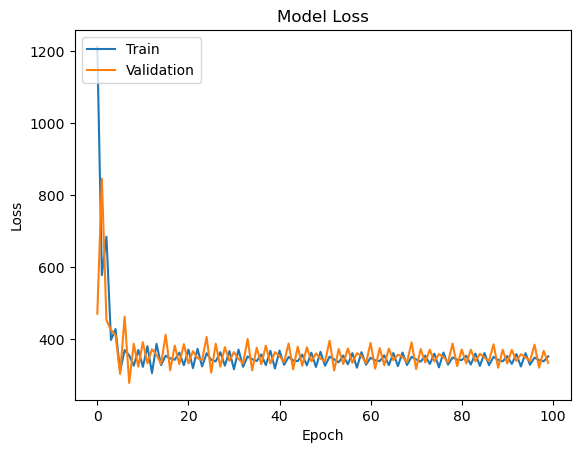

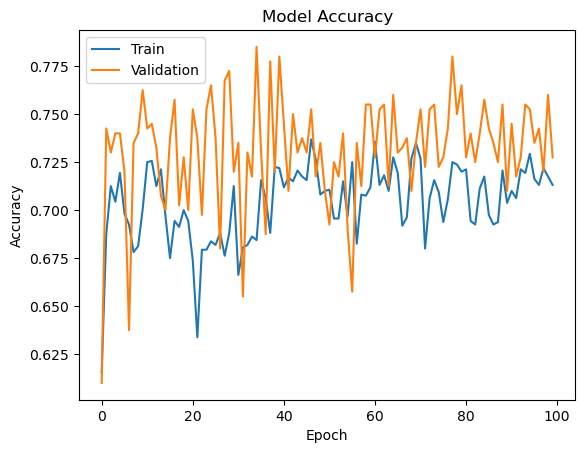

In [127]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Using test data to see model performance: This validation and training perfromacne proves that there is overfitting in the model. It seems after experimenation that a standard MLP is not fit for the task of determining false information or true information. I tried changing model hyper parameters such as batch size, and learning rate as well as changing model archetecture as I believe that the model was not performing well due to being to complex but perhaps I was wrong.

Now I will try the model using the keras embedding layer instead of just flattening the text embeddings. 

In [135]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Flatten
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer


# Convert text data to sequences of word indices

tokenizer = Tokenizer()

tokenizer.fit_on_texts(training_data)

word_indices = tokenizer.fit_on_texts(training_data)
word_indices = tokenizer.texts_to_sequences(training_data)

# Pad sequences to ensure uniform length
max_sequence_length = 100  # Adjust as needed
padded_sequences = pad_sequences(word_indices, maxlen=max_sequence_length)

# Define the MLP model
model = Sequential()
model.add(Embedding(input_dim=len(word_indices), output_dim=word, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer='l1'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
learning_rate = 0.05
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Convert training labels to numpy array
training_labels = np.array(training_labels, dtype=np.float32)

# Train the model
model.fit(padded_sequences, training_labels, epochs=100, batch_size=200, validation_split=0.2)

[69, 189, 223, 3470, 7, 213, 3471, 59, 855, 326, 1033, 432, 3472, 59, 541, 462, 1631, 1272, 5, 20]
